## Context:

Airfare pricing is the crucial aspects of aviation industry capturing the customers and airlines’ attention, since it significantly impacts on the growth and prosperity of the companies.  With the growing demand of air travel because of its convenience and time-saving advantage  compared with other transportation options, travellers have spent several hours searching for  the best flight deals. Developing the comprehensive airfare analysis and prediction model can play pivotal role in understanding the various factors affecting the flight price, optimizing the revenue strategies and helps passengers to make inform decisions when booking flights. Our project aims to conduct in-depth analysis exploration  and construct airfare price prediction model.

## Objective:
+ Conducting the exploratory analysis to grasp the basic knowledge about dataset  
+ Develop a data-driven model to make prediction accuracy
+ Evaluate and assess the performance of the model that can be compared with the facts in realistic
+ Provide recommendations to airlines and consumers based on gained insights

## Dataset:


The various features of the cleaned dataset are explained below:
* **Airline:** The name of the airline company is stored in the airline column. It is a categorical feature having 6 different airlines.
* **Flight:** Flight stores information regarding the plane's flight code. It is a categorical feature.
* **Source City:** City from which the flight takes off. It is a categorical feature having 6 unique cities.
* **Departure Time:** This is a derived categorical feature obtained created by grouping time periods into bins. It stores information about the departure time and have 6 unique time labels.
* **Stops:** A categorical feature with 3 distinct values that stores the number of stops between the source and destination cities.
* **Arrival Time:** This is a derived categorical feature created by grouping time intervals into bins. It has six distinct time labels and keeps information about the arrival time.
* **Destination City:** City where the flight will land. It is a categorical feature having 6 unique cities.
* **Class:** A categorical feature that contains information on seat class; it has two distinct values: Business and Economy.
* **Duration:** A continuous feature that displays the overall amount of time it takes to travel between cities in hours.
* **Days Left:** This is a derived characteristic that is calculated by subtracting the trip date by the booking date.
* Price: Target variable stores information of the ticket price


### Import The necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing data
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# algorithm to use
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

# Metrics to evaluate the models
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import GridSearchCV

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold, cross_val_predict, KFold

### Read the dataset

In [ ]:
df = pd.read_csv('Clean_Dataset.csv')

In [ ]:
# Splitt the subdata from the data
df_test, data, y_test, y_data = train_test_split(df, df['price'], test_size = 0.1)

In [ ]:
data

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
14324,14324,Vistara,UK-993,Delhi,Afternoon,one,Night,Bangalore,Economy,8.08,23,4496
15422,15422,Vistara,UK-813,Delhi,Evening,zero,Night,Bangalore,Economy,2.83,28,4501
122436,122436,Indigo,6E-224,Kolkata,Night,zero,Night,Delhi,Economy,2.50,20,3999
85056,85056,Air_India,AI-516,Bangalore,Early_Morning,one,Night,Delhi,Economy,15.42,7,9904
13702,13702,Indigo,6E-2247,Delhi,Morning,one,Evening,Bangalore,Economy,8.58,20,4249
...,...,...,...,...,...,...,...,...,...,...,...,...
162599,162599,Vistara,UK-870,Hyderabad,Night,one,Evening,Mumbai,Economy,22.50,30,4266
215557,215557,Vistara,UK-945,Delhi,Morning,one,Night,Bangalore,Business,9.25,45,49177
99865,99865,Indigo,6E-6257,Bangalore,Early_Morning,one,Morning,Mumbai,Economy,3.92,34,3153
64232,64232,Vistara,UK-988,Mumbai,Night,one,Evening,Kolkata,Economy,22.67,17,6159


### Printing the information

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


* **Observation**:
There are 300153 observations and 34 columns.
All that column have 300153 non-null values, there are no missing values in the data

In [ ]:
# Checking unique values in each columns
data.nunique()

Unnamed: 0          30016
airline                 6
flight               1360
source_city             6
departure_time          6
stops                   3
arrival_time            6
destination_city        6
class                   2
duration              421
days_left              49
price                5265
dtype: int64

* **Observation**:
On the basic number of unique values in each columns and data description we can identify continuous and categorical columns in the data

### Cleaning the data

In [ ]:
data_object = data.select_dtypes(include = ['object'])
print(f"Categorical variables: {data_object.columns.tolist()}")

Categorical variables: ['airline', 'flight', 'source_city', 'departure_time', 'stops', 'arrival_time', 'destination_city', 'class']


In [ ]:
data_int = data.select_dtypes(include = ['int64'])
print(f"Numerical columns: {data_int.columns.tolist()}")


Numerical columns: ['Unnamed: 0', 'days_left', 'price']


In [ ]:
# Drop the Unnamed column
data.drop(columns = ['Unnamed: 0'], inplace = True)

In [ ]:
# Drop the flight column
data.drop(columns = ['flight'], inplace = True)

In [ ]:
data.select_dtypes(include = ['int64']).describe().T

,count,mean,std,min,25%,50%,75%,max
days_left,30016.0,26.027885,13.546723,1.0,15.0,26.0,38.0,49.0
price,30016.0,20940.342484,22815.140237,1105.0,4792.0,7425.0,42521.0,110936.0


* **Observation**: Average airfare price stands at around 20889 with the maximum price of airfare of 123071 and the minimum flight price of 1105
The airfares are often purchased, on average, 26 days in advange. While some travellers will buy ticket as early as minimum 1 day at least or up to maximum 49 days beforehand

In [ ]:
def outliers_IQR(df, remove = True):
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    IQR = q3 - q1
    if remove:
        outliers_remove = df[~((df < (q1 - IQR*1.5)) | (df > (q3 + IQR*1.5)))]
        return outliers_remove
    else:
        outliers = df[(df < (q1 - IQR*1.5)) | (df > (q3 + IQR*1.5))]
        return outliers

In [ ]:
outliers_duration = outliers_IQR(data['duration'], remove = False)
print(f"Number of outlier in durarion: {len(outliers_duration)}")
print(f"Max outlier value : {outliers_duration.max()}")
print(f"Min outlier value : {outliers_duration.min()}")

Number of outlier in durarion: 202
Max outlier value : 40.42
Min outlier value : 30.25


In [ ]:
outliers_price = outliers_IQR(data['price'], remove = False)
print(f"Number of outliers in price: {len(outliers_price)}")
print(f"Max outlier value: {outliers_price.max()}")
print(f"Min outlier value: {outliers_price.min()}")

Number of outliers in price: 16
Max outlier value: 110936
Min outlier value: 99204


In [ ]:
# remove outlier in the price and duration, then relace by mean value
data[['price', 'duration']] = outliers_IQR(data[['price', 'duration']], remove = True)
data['price'].fillna(data['price'].mean(), inplace=True)
data['duration'].fillna(data['duration'].mean(), inplace = True)

### Exporatory data

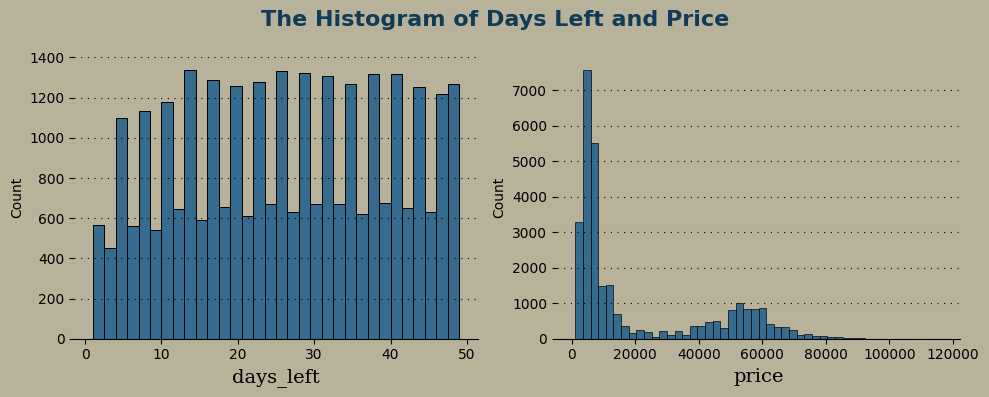

In [ ]:
background_color = '#b8b29a'
fig = plt.figure(figsize=(10, 4))
fig.patch.set_facecolor(background_color)

for i, col in enumerate(['days_left', 'price']):
    ax = plt.subplot(1, 2, i + 1)
    sns.histplot(x=col, data=data, color='#08538a')
    ax.set_xlabel(col, fontsize=14, fontfamily='serif', color='#000000')
    ax.set_facecolor(background_color)
    ax.grid(color='#000000', linestyle=':', axis='y', zorder=0, dashes=(1, 5))

    for s in ['top', 'right', 'left']:
        ax.spines[s].set_visible(False)

plt.suptitle("The Histogram of Days Left and Price", fontsize=16, fontweight='bold', color='#0f3b56')
plt.tight_layout()
plt.show()

* **Observation**: The percentage of the airfare price are skewed on the left, which means the prices of flight are approximately under 20.000
the day preceding the flight is close to normal distribution with majority of customers who buy the ticker before from 1 to 49 days of flights

In [ ]:
for i in data_object.columns.to_list():
    print(data_object[i].value_counts(normalize = True))
    print('*'*5)

Vistara      0.423807
Air_India    0.272388
Indigo       0.143490
GO_FIRST     0.075959
AirAsia      0.052772
SpiceJet     0.031583
Name: airline, dtype: float64
*****
UK-706     0.010628
UK-772     0.009195
UK-720     0.008595
UK-874     0.008529
UK-836     0.008262
             ...   
6E-6121    0.000033
6E-448     0.000033
6E-821     0.000033
6E-2057    0.000033
6E-715     0.000033
Name: flight, Length: 1360, dtype: float64
*****
Mumbai       0.206690
Delhi        0.204891
Bangalore    0.171109
Kolkata      0.153918
Hyderabad    0.135361
Chennai      0.128032
Name: source_city, dtype: float64
*****
Morning          0.239039
Early_Morning    0.218850
Evening          0.217417
Night            0.160181
Afternoon        0.159915
Late_Night       0.004598
Name: departure_time, dtype: float64
*****
one            0.833156
zero           0.123034
two_or_more    0.043810
Name: stops, dtype: float64
*****
Night            0.307036
Evening          0.261594
Morning          0.209288
Afternoo

* **Observation**: Vistara is the domminant airline brand in India, while other brands such as Air_India  
,Indigo ,GO_FIRST ,AirAsia ,SpiceJet take account for small percentage
The majority of flights operate in morning, afternoon and night. Commuters refers to travel during these times rather than in late night.
Over 80% of stops are 1, indicating moving from this cities to another is short distance.
Nearly 70% of flight are economy suggesting travellers refer flight economic class rather than business class.
Delhi and mumbi are the common destinations of these airline brands

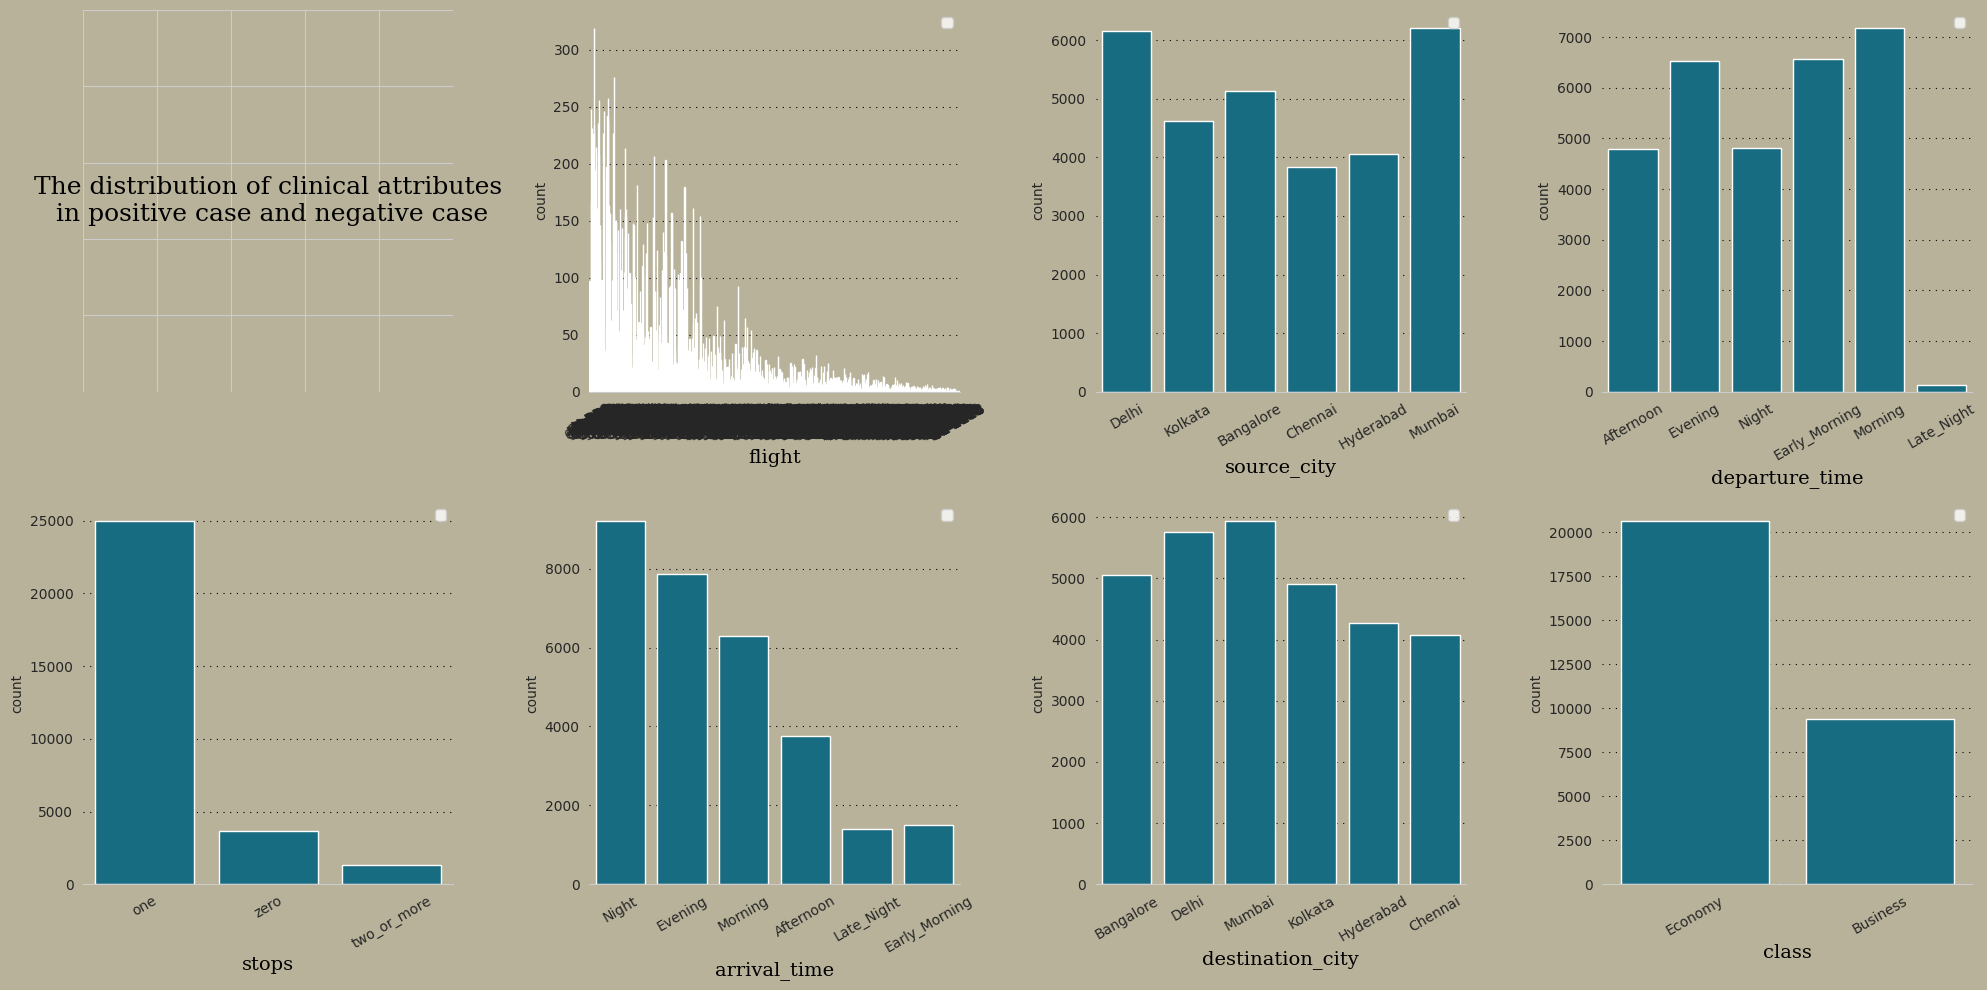

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

data_object_cl = data_object.columns.to_list()

fig = plt.figure(figsize=(20, 10))
background_color = '#b8b29a'
fig.patch.set_facecolor(background_color)

for i, cl in enumerate(data_object_cl):
    ax = plt.subplot(2, 4, i + 1)

    if i == 0:
        ax.text(0.5, 0.5, "The distribution of clinical attributes\n in positive case and negative case",
               horizontalalignment='center',
               verticalalignment='center',
               fontsize=18, fontfamily='serif', color='#000000')
        ax.set_facecolor(background_color)
        ax.spines[['bottom', 'top', 'right', 'left']].set_visible(False)
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        ax.tick_params(left=False, right=False)
        continue

    sns.countplot(x=cl, data=data_object, color = '#077692')

    plt.xticks(rotation=30)  # Rotate the x-axis labels for all subplots
    ax.set_xlabel(cl, fontsize=14, fontfamily='serif', color='#000000')

    ax.legend()
    ax.set_facecolor(background_color)
    ax.grid(color='#000000', linestyle=':', axis='y', zorder=0, dashes=(1, 5))

    for s in ['top', 'right', 'left']:
        ax.spines[s].set_visible(False)

plt.tight_layout()
plt.show()

* **Observation**: The destination city is often the bigger cities such as Mumbai and Delhi, there are many of flights departuring from these cities
The arrival time are night, morning, evening while there are few flight at early morning or late night.
Most of flight have one stop, the direct flight or two or more transit is not common

Text(0.5, 1.0, 'The Count of Passengers in Each Airliner')

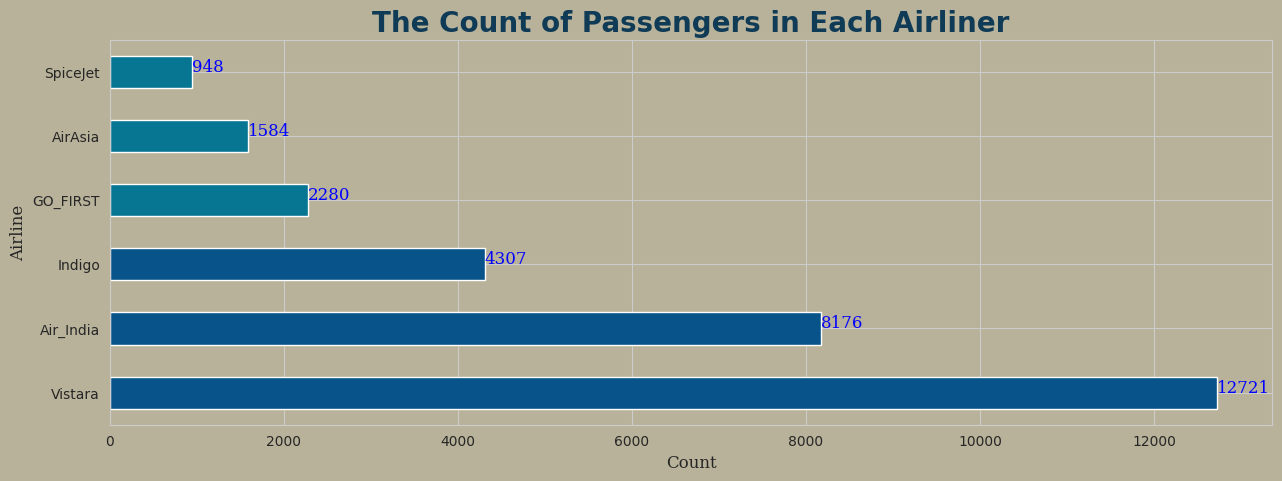

In [ ]:
airline_counts = data['airline'].value_counts().sort_values(ascending = False)
sns.set_style('whitegrid')

fig, ax = plt.subplots(1,1, figsize = (15,5))

color_map = ['#077692' for _ in range(6)]
color_map[0] = color_map[1] = color_map[2] = '#08538a'

airline_counts.plot(kind = 'barh', color = color_map)
for i, v in enumerate(airline_counts):
    plt.text(v, i + 0.01, str(v), color = 'b',fontsize=12, fontweight='light', fontfamily='serif')


background_color = '#b8b29a'
fig.patch.set_facecolor(background_color)
ax.set_facecolor(background_color)

plt.xlabel('Count',fontsize=12, fontweight='light', fontfamily='serif')
plt.ylabel('Airline',fontsize=12, fontweight='light', fontfamily='serif')
plt.title("The Count of Passengers in Each Airliner", fontsize = 20, fontweight = 'bold', color = '#0f3b56')

* **Observation**: There are three popular airlines such as Indio, Air India, Vistara selected by commuters, however other brands like Spciejet, AirAsia, Go-First are less common selection of customers

Text(0.5, 1.0, 'The Average Airfare Price of Each Airlines ')

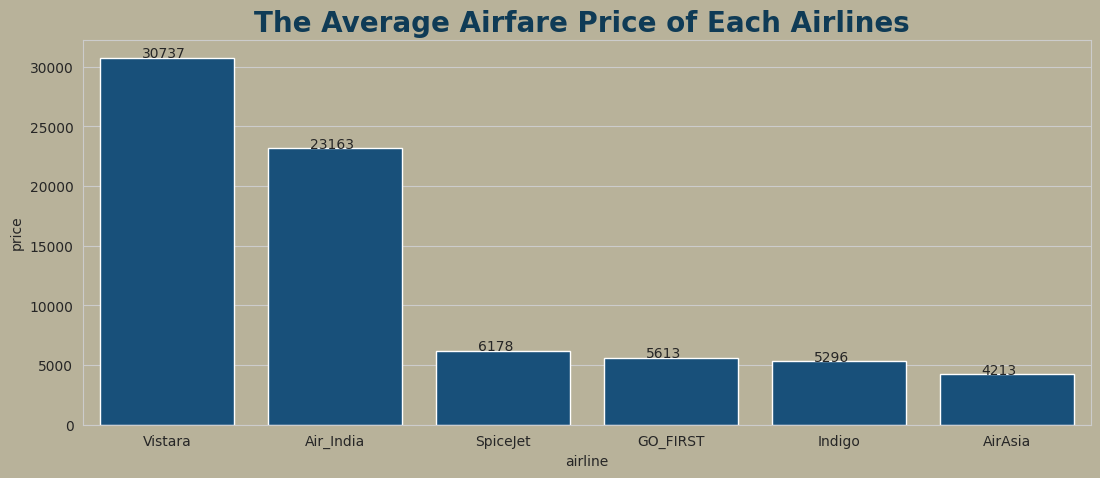

In [ ]:
airfare_price = data.groupby('airline')['price'].mean().reset_index()
avg_price = airfare_price.sort_values(by = 'price', ascending = False)

fig, ax = plt.subplots(1,1, figsize = (13,5))
sns.barplot(x = 'airline', y = 'price', data = avg_price, color = '#08538a')

for i, e in enumerate(avg_price['price']):
    plt.text(i - 0.15, int(e) + 30, str(int(e)))

background_color = '#b8b29a'
fig.patch.set_facecolor(background_color)
ax.set_facecolor(background_color)
plt.title("The Average Airfare Price of Each Airlines ", fontsize = 20, fontweight = 'bold', color = '#0f3b56')

* **Observation**: The airfare price for Vistara and Air India are relatively expensive, whereas  other companies offer tickets at a significantly lower cost, about one-fifth the price

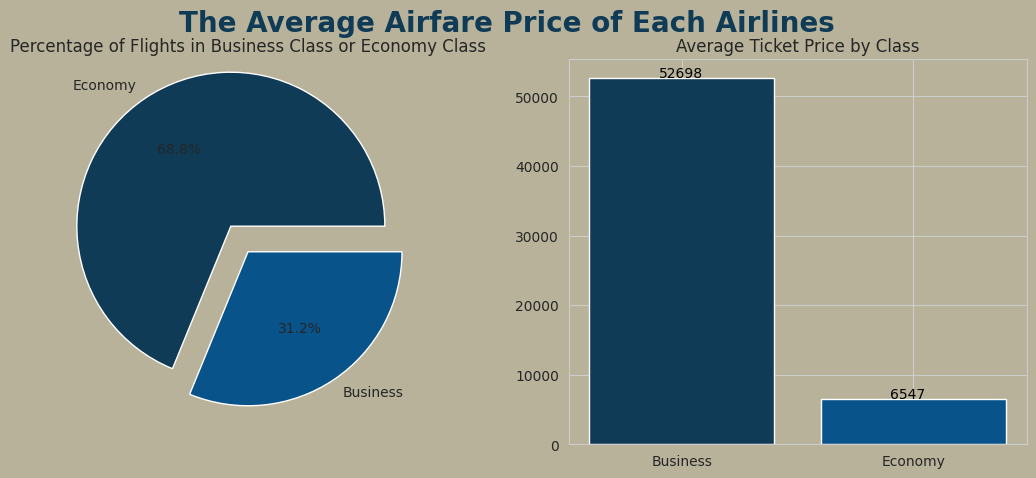

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

class_counts = data['class'].value_counts()

# Calculate percentages
percentages = [(value / sum(class_counts)) * 100 for value in class_counts]
colors = ['#0f3b56', '#08538a']

fig, ax = plt.subplots(1, 2, figsize=(13, 5))

# Create a pie chart for class distribution
ax[0].pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', colors=colors, explode = [0.2,0])
ax[0].set_title("Percentage of Flights in Business Class or Economy Class")

# Create a bar chart for average ticket prices
price_ticket = data.groupby('class')['price'].mean()
ax[1].bar(price_ticket.index, price_ticket, color=colors)
ax[1].set_title("Average Ticket Price by Class")
for i, v in enumerate(price_ticket):
    ax[1].text(i - 0.1, int(v) + 50, str(int(v)), color = 'black')

background_color = '#b8b29a'
fig.patch.set_facecolor(background_color)

# Set face color for each axis
for axis in ax:
    axis.set_facecolor(background_color)

plt.suptitle("The Average Airfare Price of Each Airlines", fontsize=20, fontweight='bold', color = '#0f3b56')

plt.show()


Most of passengers prefer to select to economy class for their flights because of its reasonable price while the business class is nearly 10 times more expensive. More specifically, the economic class stands at 68.9%, whereas 31,1% of business class

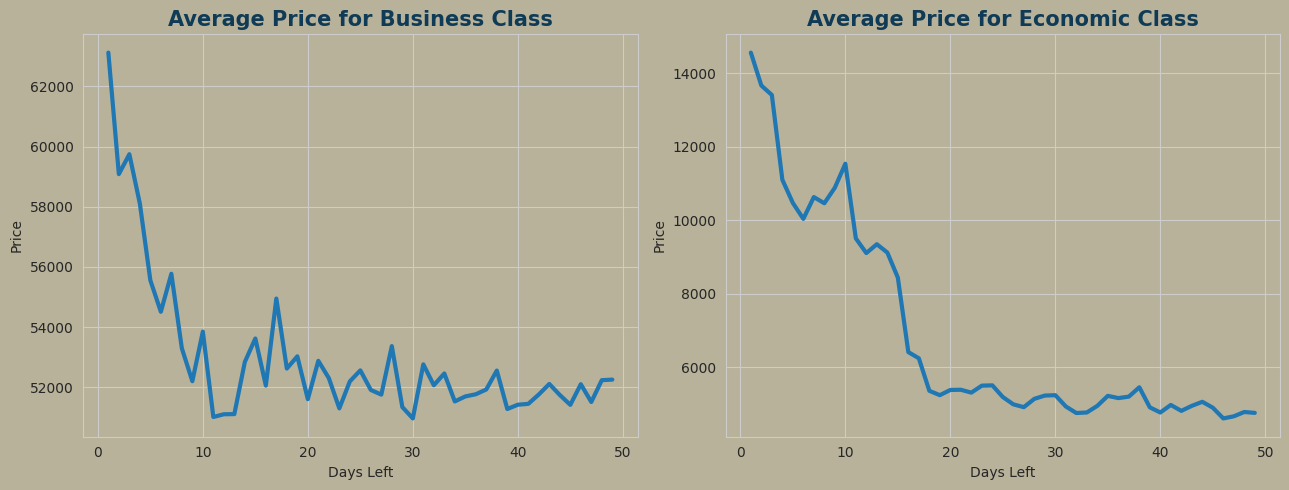

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with two subplots
fig, ax = plt.subplots(1, 2, figsize=(13, 5))

# Subplot 1: Business Class
day_analysis_business = data[data['class'] == 'Business'].groupby('days_left')['price'].mean().reset_index()
sns.lineplot(x='days_left', y='price', data=day_analysis_business, ax=ax[0], linewidth = 3)
ax[0].set_title('Average Price for Business Class', fontsize = 15, fontweight = 'bold', color = '#0f3b56')
ax[0].set_xlabel('Days Left')
ax[0].set_ylabel('Price')

# Subplot 2: Economic Class
day_analysis_economic = data[data['class'] == 'Economy'].groupby('days_left')['price'].mean().reset_index()
sns.lineplot(x='days_left', y='price', data=day_analysis_economic, ax=ax[1], linewidth = 3)
ax[1].set_title('Average Price for Economic Class',fontsize = 15, fontweight = 'bold', color = '#0f3b56')
ax[1].set_xlabel('Days Left')
ax[1].set_ylabel('Price')

# Adjust the layout
plt.tight_layout()

background_color = '#b8b29a'
fig.patch.set_facecolor(background_color)
for axis in ax:
    axis.set_facecolor(background_color)
# Show the plots
plt.show()


* **Observation**: The airfare prices for both Business and Economic class generally increase as the flight day approaches. However, there is a notable difference in the Economic class, where the price starts to climb earlier, specifically from the 20th day, while in the Business class, the price begins to increase closer to the 10th day before the flight. This indicates that passengers booking in advance might find better prices for both classes, but the Economic class fares tend to rise earlier than those for Business class.

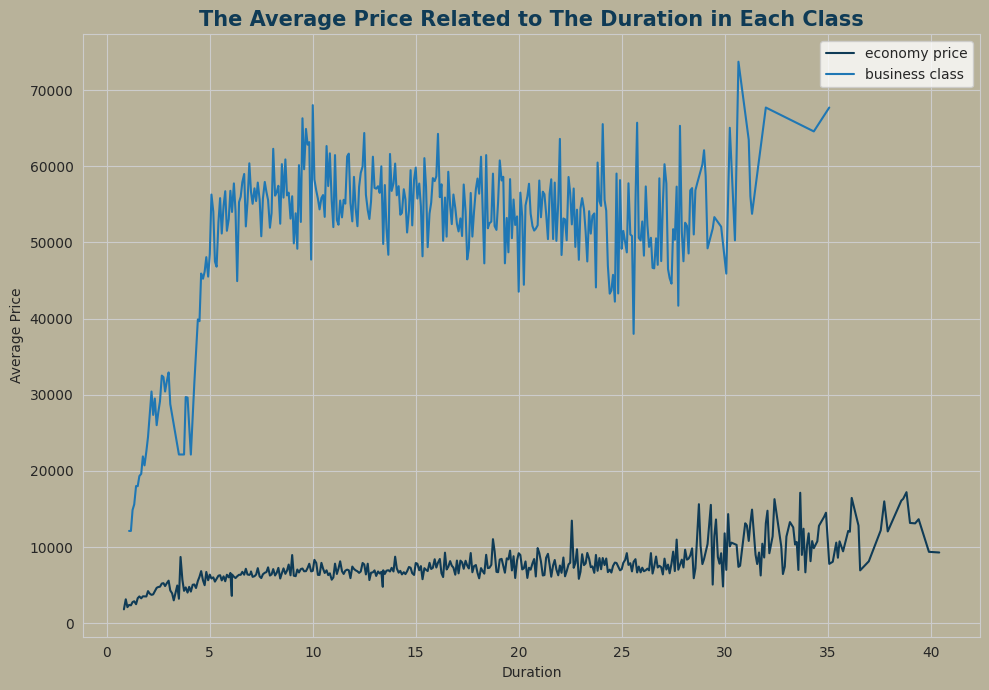

In [ ]:
fig, ax = plt.subplots(1,1, figsize = (10,7))
data_economy_price = data[data['class'] == 'Economy'].groupby('duration')['price'].mean().reset_index()
sns.lineplot(x = 'duration', y = 'price', data = data_economy_price, ax = ax, color = '#0f3b56', label = 'economy price')

data_business_price = data[data['class'] == 'Business'].groupby('duration')['price'].mean().reset_index()
sns.lineplot(x = 'duration', y ='price', data = data_business_price, ax = ax, label = 'business class')

ax.set_xlabel('Duration')
ax.set_ylabel('Average Price')
ax.set_title('The Average Price Related to The Duration in Each Class', fontweight = 'bold', color = '#0f3b56', fontsize = 15)
# Adjust the layout
plt.tight_layout()
background_color = '#b8b29a'
fig.patch.set_facecolor(background_color)
ax.set_facecolor(background_color)

# Show the plots
plt.show()

* **Observation**: On avarage, economy class tickets are more affordable than the price of buisness class. Furthermore, both of two type tickets tend to have have lower price for the shorter flight. In contrast, the price of flight lasting more than 40 hours will be more expensive than flights under 30 hours. Notably, the airfare price of the economic class remain relatively stale, while business class ticket prices exhibit signicantly fluctuation, suggesting that passengers can find the favorable deals in the business class if they take effort to search and monitor prices closely

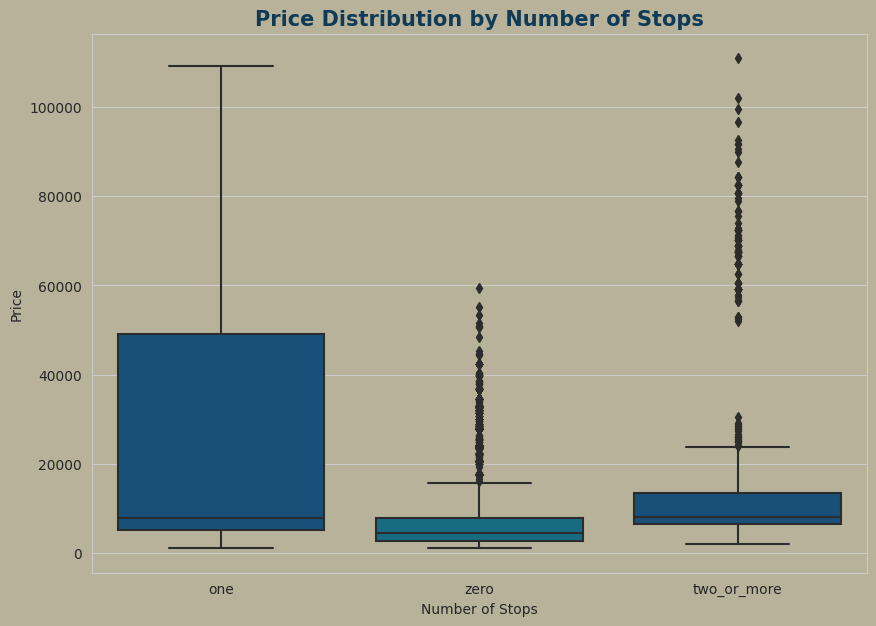

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define a custom color palette for your box plot
custom_palette = ['#08538a', '#077692', '#08538a']
fig, ax = plt.subplots(1,1, figsize = (10,7))
# Create the box plot using the custom palette
sns.boxplot(x='stops', y='price', data=data, palette=custom_palette)

# Set labels and title for the plot
plt.xlabel('Number of Stops')
plt.ylabel('Price')
plt.title('Price Distribution by Number of Stops', fontweight = 'bold', color = '#0f3b56', fontsize = 15)

background_color = '#b8b29a'
fig.patch.set_facecolor(background_color)
ax.set_facecolor(background_color)

plt.show()


* **Observation**: On avarage, the avarage flight price are relatively consistent. However, it is worth noting that the price flight with one stops show wide price range from 15000 to 45000, whereas the price of non-stop flight or flight with two or more stops exihibits have various ouitliers, indicating that their price is less stable and can vary significantly

### Preprocessing data before running machine learning model

In [ ]:
# USing one hot coding for object category
categorical_clumns = data.select_dtypes(include = ['object']).columns.to_list()

categorical_no_order = pd.get_dummies(data[categorical_clumns], dummy_na = False)

categorical_no_order = categorical_no_order.astype('int')

In [ ]:
# Merge all data columns together
data_numb = data[['duration', 'days_left', 'price']]
data_final = pd.concat([data_numb, categorical_no_order], axis=1)

# Transform data
from sklearn.preprocessing import MinMaxScaler
names = data_final.columns
index = data_final.index
sc = MinMaxScaler((0,1))
df = sc.fit_transform(data_final)
X_scaled = pd.DataFrame(df, columns = names, index = index)
X_scaled.head()

In [ ]:
# Splitting the data
X = X_scaled.drop('price', axis = 1)
y = X_scaled.price

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state= 1)

### Machine learning model

In [ ]:
# The metric to measure the accuracy of the model
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

class model_result:
  def __init__(self, model, X_train, X_test, y_train, y_test):
    self.model = model
    self.X_train = X_train
    self.X_test = X_test
    self.y_train = y_train
    self.y_test = y_test
    self.y_pred_train = self.model.predict(self.X_train)
    self.y_pred_test = self.model.predict(self.X_test)

  def cross_vl_score(self):
    self.result_mean_train = cross_val_score(self.model, self.X_train, self.y_train, cv = 5).mean()
    self.result_mean_test = cross_val_score(self.model, self.X_test, self.y_test, cv = 5).mean()
    return self

  def mse_score(self):
    self.mse_train = mean_squared_error(self.y_train, self.y_pred_train)
    self.mse_test = mean_squared_error(self.y_test, self.y_pred_test)
    return self

  def R_square(self):
    self.r2_train = r2_score(self.y_train, self.y_pred_train)
    self.r2_test = r2_score(self.y_test, self.y_pred_test)
    return self

  def mae_score(self):
    self.mae_train = mean_absolute_error(self.y_train, self.y_pred_train)
    self.mae_test = mean_absolute_error(self.y_test, self.y_pred_test)
    return self

  def model_metrics(self):
    df_result = pd.DataFrame({"set" : ["train", "test"],
                           "Result": [self.result_mean_train, self.result_mean_test],
                           "MSE": [self.mse_train, self.mse_test],
                           "R_square": [self.r2_train, self.r2_test],
                           "MAE": [self.mae_train, self.mae_test]})
    return df_result



#### Linear regression

In [ ]:
# Linear regression
linear_regression = LinearRegression()
linear_regression.fit(X_train, y_train)
y_pred_lr = linear_regression.predict(X_test)

In [ ]:
result_test_lr = model_result(linear_regression, X_train, X_test, y_train, y_test)
df_metrics_lr = result_test_lr.cross_vl_score().mse_score().R_square().mae_score().model_metrics() # Get model metrics as a DataFrame
print(df_metrics_lr)


     set    Result       MSE  R_square       MAE
0  train  0.911030  0.003084  0.911064  0.037545
1   test  0.912316  0.003026  0.912367  0.037223


In [ ]:
pred_lr = result_test_lr.y_pred_test
pred_lr

array([0.02880669, 0.06814766, 0.04060555, ..., 0.09728432, 0.02928734,
       0.46950912])

#### Decision tree

In [ ]:
# Decision tree
dt = DecisionTreeRegressor(max_depth = 10, min_samples_split=15)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

In [ ]:
result_test_dt = model_result(dt, X_train, X_test, y_train, y_test)
dt_metrics = result_test_dt.cross_vl_score().mse_score().R_square().mae_score().model_metrics() # Get model metrics as a DataFrame
print(dt_metrics)

     set    Result       MSE  R_square       MAE
0  train  0.961000  0.001331  0.961630  0.020135
1   test  0.960771  0.001306  0.962185  0.019960


In [ ]:
pred_dt = result_test_dt.y_pred_test
pred_dt

array([0.04090364, 0.05821902, 0.01108089, ..., 0.04891795, 0.01829518,
       0.5802272 ])

#### KNeighborsRegressor

In [ ]:
# KNeighborsRegressor
params = {
    "n_neighbors" : [5,15,25,30,40,100],
    "weights": ['uniform', 'distance']
}
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# Define your parameter grid
params = {
    "n_neighbors": [5, 15, 25, 30, 40, 100],
    "weights": ['uniform', 'distance']
}

# Create a KNeighborsRegressor model with early stopping (you may need a custom early stopping implementation)
knn = KNeighborsRegressor()

# Create a GridSearchCV object
grid_search = GridSearchCV(knn, params, cv=4, n_jobs=-1)

# Fit the GridSearchCV object to your data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters from the grid search
best_params = grid_search.best_params_
best_params

{'n_neighbors': 5, 'weights': 'uniform'}

In [ ]:
knn = KNeighborsRegressor(n_neighbors=best_params['n_neighbors'], weights=best_params['weights'])
knn.fit(X_train, y_train)

KNeighborsRegressor()

In [ ]:
result_test = model_result(knn, X_train, X_test, y_train, y_test)
knn_metrics = result_test.cross_vl_score().mse_score().R_square().mae_score().model_metrics() # Get model metrics as a DataFrame
print(knn_metrics)

     set    Result       MSE  R_square       MAE
0  train  0.968747  0.000661  0.980943  0.012497
1   test  0.964759  0.000974  0.971780  0.015584


In [ ]:
pred_knn = result_test.y_pred_test
pred_knn

array([0.03825   , 0.06808947, 0.01677025, ..., 0.04812161, 0.01706049,
       0.5737517 ])

#### Random Forest Regressor


In [ ]:
# RabdomForestRegressor
from sklearn.ensemble import RandomForestRegressor
rt = RandomForestRegressor(n_estimators = 100, max_depth = 10, random_state = 42)

rt.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, random_state=42)

In [ ]:
result_test_rt = model_result(rt, X_train, X_test, y_train, y_test)
rt_metrics = result_test_rt.cross_vl_score().mse_score().R_square().mae_score().model_metrics() # Get model metrics as a DataFrame
print(rt_metrics)

     set    Result       MSE  R_square       MAE
0  train  0.963263  0.001243  0.964166  0.019508
1   test  0.965118  0.001216  0.964775  0.019331


In [ ]:
pred_rt = result_test_rt.y_pred_test
pred_rt

array([0.0409911 , 0.06071425, 0.01198082, ..., 0.04888337, 0.01812769,
       0.58889037])

#### Neural Network

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
NN = Sequential()
NN.add(Dense(5, input_dim = X_train.shape[1], activation = 'relu'))
NN.add(Dense(1))
NN.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5)                 190       
                                                                 
 dense_1 (Dense)             (None, 1)                 6         
                                                                 
Total params: 196 (784.00 Byte)
Trainable params: 196 (784.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
NN.compile(loss = 'mean_squared_error', optimizer = 'sgd', metrics = ['accuracy', 'mean_squared_error','mean_absolute_error'])
history = NN.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 20, batch_size = 64)

Epoch 1/20
3283/3283 [==============================] - 7s 2ms/step - loss: 0.0157 - accuracy: 9.8997e-04 - mean_squared_error: 0.0157 - mean_absolute_error: 0.0803 - val_loss: 0.0046 - val_accuracy: 0.0010 - val_mean_squared_error: 0.0046 - val_mean_absolute_error: 0.0442
Epoch 2/20
3283/3283 [==============================] - 4s 1ms/step - loss: 0.0037 - accuracy: 9.9473e-04 - mean_squared_error: 0.0037 - mean_absolute_error: 0.0393 - val_loss: 0.0031 - val_accuracy: 0.0010 - val_mean_squared_error: 0.0031 - val_mean_absolute_error: 0.0361
Epoch 3/20
3283/3283 [==============================] - 5s 2ms/step - loss: 0.0029 - accuracy: 9.9473e-04 - mean_squared_error: 0.0029 - mean_absolute_error: 0.0350 - val_loss: 0.0027 - val_accuracy: 0.0010 - val_mean_squared_error: 0.0027 - val_mean_absolute_error: 0.0339
Epoch 4/20
3283/3283 [==============================] - 5s 1ms/step - loss: 0.0027 - accuracy: 9.9473e-04 - mean_squared_error: 0.0027 - mean_absolute_error: 0.0336 - val_loss: 0

In [ ]:
from sklearn.metrics import accuracy_score

nn_dataframe = pd.DataFrame(columns = ['MAE', 'MSE', 'R-Squared'])
y_pred_nn_train = NN.predict(X_train)
y_pred_nn_test = NN.predict(X_test)

mse_nn_train = mean_squared_error(y_train, y_pred_nn_train)
mse_nn_test = mean_squared_error(y_test, y_pred_nn_test)

r2_nn_train = r2_score(y_train, y_pred_nn_train)
r2_nn_test = r2_score(y_test, y_pred_nn_test)

mae_nn_train = mean_absolute_error(y_train, y_pred_nn_train)
mae_nn_test = mean_absolute_error(y_test, y_pred_nn_test)

nn_dataframe = pd.DataFrame({'set' : ['train', 'test'],
                            'MSE': [mse_nn_train, mse_nn_test],
                            'R_square': [r2_nn_train, r2_nn_test],
                            'MAE': [mae_nn_train, mae_nn_test]}
                           )
nn_dataframe

2814/2814 [==============================] - 2s 857us/step


,set,MSE,R_square,MAE
0,train,0.002240,0.935416,0.031047
1,test,0.002172,0.937096,0.030670


In [ ]:
nn_dataframe = nn_dataframe[nn_dataframe['set'] == 'test']
nn_dataframe

,set,MSE,R_square,MAE
1,test,0.002172,0.937096,0.03067


#### Evaluate the machine learning models

In [ ]:
def calculate_cumulative_count_and_rate(y_true, y_pred):
  results_df = pd.DataFrame()
  results_df['target'] = y_true
  results_df['predicted'] = y_pred
  results_df = results_df.sort_values(by='predicted', ascending=False)

  results_df['cumulative_count'] = np.arange(1, len(results_df)+1)
  results_df['cumulative_pos'] = results_df['target'].cumsum()
  results_df['cumulative_rate'] = results_df['cumulative_pos'] / results_df['target'].sum()
  return results_df[['cumulative_count','cumulative_pos','cumulative_rate','target']]

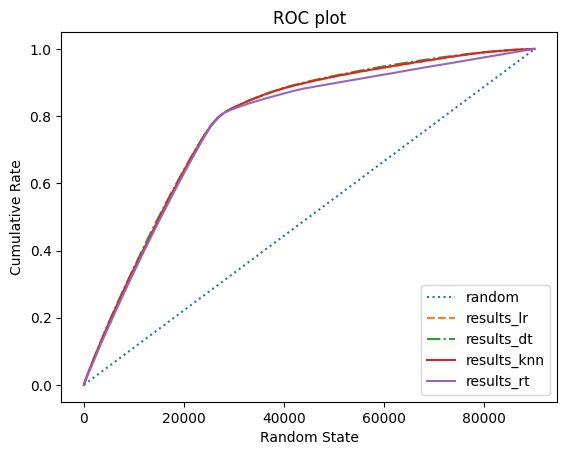

In [ ]:
import matplotlib.pyplot as plt

random_state = np.linspace(0, 1, len(results_lr))
list_model = []
list_model_label = ['random', 'results_lr', 'results_dt', 'results_knn', 'results_rt', 'results_nn']
linestyles = [":", "--", "-.","-", "-", "solid"]

pred_list = [pred_lr, pred_dt, pred_knn, pred_rt, y_pred_nn_test]
df_list = [df_metrics_lr, dt_metrics, knn_metrics, rt_metrics, nn_dataframe]

# Calculate AUC for each model and assign to the respective DataFrames
for i, j in zip(pred_list, df_list):
    cumulative_df = calculate_cumulative_count_and_rate(y_test, i)
    auc_value = np.trapz(cumulative_df['cumulative_rate'], x=cumulative_df['cumulative_count']) / (len(cumulative_df) * cumulative_df['target'].mean())
    j['AUC'] = auc_value
    list_model.append(cumulative_df)

# Plot the AUC and ROC
for i, (model, label, linestyle) in enumerate(zip(list_model, list_model_label,linestyles )):
    if i == 0:
        plt.plot(model.cumulative_count, random_state, label=label, linestyle = linestyle)
    else:
        plt.plot(model.cumulative_count, model.cumulative_rate, label=label, linestyle = linestyle)

plt.legend()
plt.xlabel('Random State')
plt.ylabel('Cumulative Rate')
plt.title('ROC plot')
plt.show()


In [ ]:
pred_list = [pred_lr, pred_dt, pred_knn, pred_rt, y_pred_nn_test]
df_list = [df_metrics_lr, dt_metrics, knn_metrics, rt_metrics, nn_dataframe]

# Calculate AUC for each model and assign to the respective DataFrames
for i, j in zip(pred_list, df_list):
    cumulative_df = calculate_cumulative_count_and_rate(y_test, i)
    auc_value = np.trapz(cumulative_df['cumulative_rate'], x=cumulative_df['cumulative_count']) / (len(cumulative_df) * cumulative_df['target'].mean())
    j['AUC'] = auc_value

# Create the index and columns for the result DataFrame
columns = ['Result', 'MSE', 'R_square', 'MAE', 'AUC']
index = ['Linear Regression', 'Decision Tree', 'KNN', 'Regression Tree', 'Neural Network']  # Removed the space before 'KNN'

for i in range(len(df_list)):
  if i != len(df_list) - 1:
    test_set_results = df_list[i][df_list[i]['set'] == 'test'][columns]

    result = pd.concat([result, test_set_results])
result_metric = result.drop_duplicates()

In [ ]:
result_metric =result_metric.reset_index().drop(0)

result_metric = pd.concat([result_metric,nn_dataframe], axis = 0)

result_metric.insert(0, "Model", index)

result_metric.drop(["set", "index"], axis = 1, inplace = True)

result_metric[['Result', 'R_square']] = result_metric[['Result', 'R_square']].round(2).applymap(lambda x: f"{x*100:.2f}%")

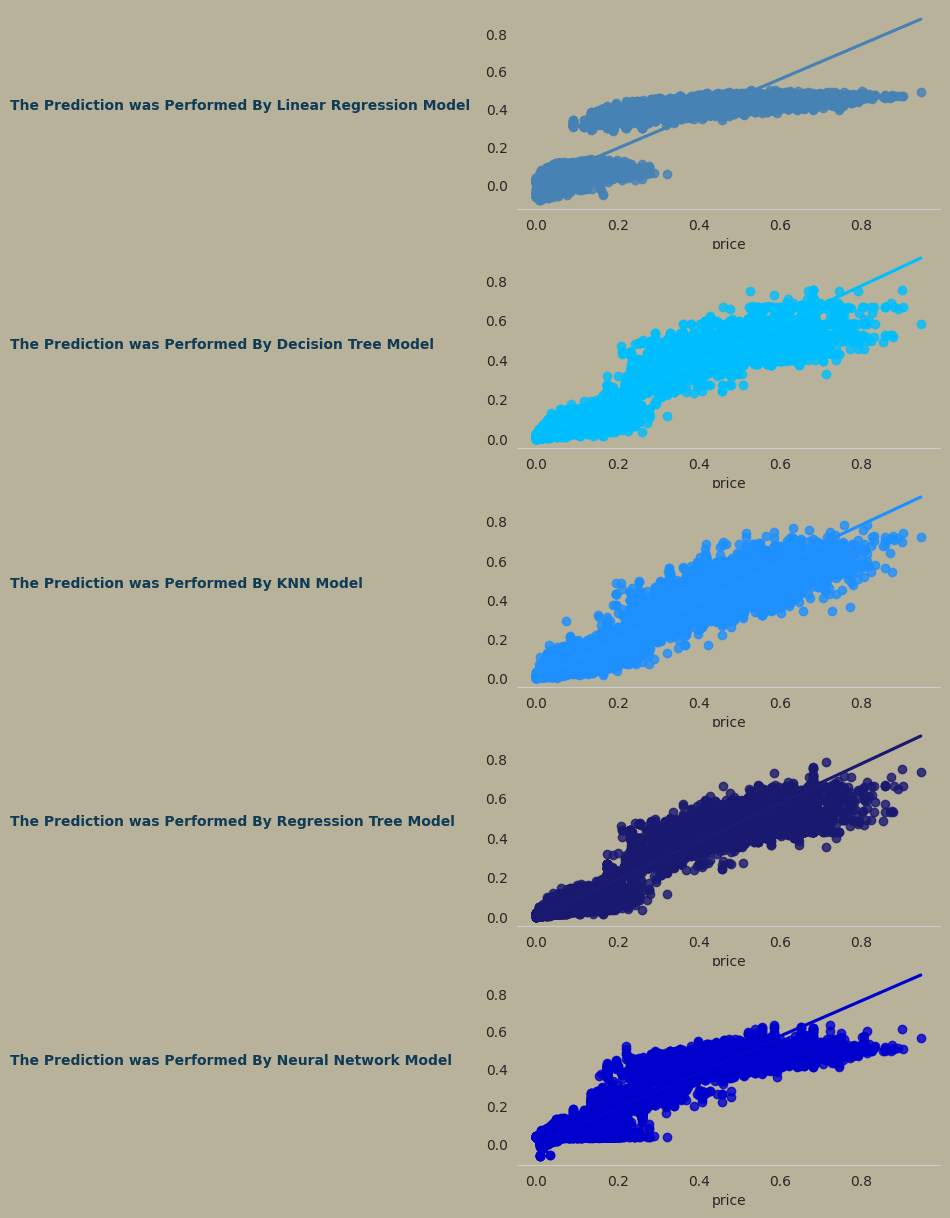

In [ ]:
color = ['#4682B4', '#00BFFF', '#1E90FF','#191970', '#0000CD']
fig, ax = plt.subplots(5,2, figsize = (12,15))
fig.patch.set_facecolor(background_color)
for i in range(len(pred_list)):
  sns.regplot(x = y_test, y = pred_list[i], ax = ax[i,1], color = color[i])
  ax[i,1].set_facecolor(background_color)
  ax[i,1].grid(False)
  ax[i,0].text(0, 0.5, f"The Prediction was Performed By {str(index[i])} Model",  fontweight = 'bold', color = '#0f3b56', fontsize = 10)
  ax[i,0].spines['bottom'].set_visible(False)
  ax[i,0].set_xticklabels([])
  ax[i,0].set_yticklabels([])
  ax[i,0].tick_params(left = False, bottom = False)
  ax[i,0].set_facecolor(background_color)
  ax[i,0].grid(False)

suplots_to_remove_spine = [(0,0), (1,0), (0,1), (1,1),(2,0),(2,1), (3,0), (4,0), (3,1), (4,1)]
angles_spines = ['top', 'left', 'right']
for plot in suplots_to_remove_spine:
    for spine in angles_spines:
        ax[plot].spines[spine].set_visible(False)



In [ ]:
result_metric

,Model,Result,MSE,R_square,MAE,AUC
1,Linear Regression,91.00%,0.003026,91.00%,0.037223,4.800572
2,Decision Tree,96.00%,0.001306,96.00%,0.019960,4.845530
3,KNN,96.00%,0.000974,97.00%,0.015584,4.862147
4,Regression Tree,97.00%,0.001216,96.00%,0.019331,4.849513
1,Neural Network,nan%,0.002172,94.00%,0.030670,4.769764


All models achieved the impressive accuracy and capture more than 90% information within the data set. It's worth noting that
The KNN is the model that standed out for the exceptional performan with the smallest mean absolute error and highest R_square at 97%, sugesting that the model is able to make high accurate predictions with minimal error.